In [1]:
import pandas as pd 
import numpy as np 


In [2]:
data = pd.read_csv("/kaggle/input/restaurant-reviewstsv/Restaurant_Reviews.tsv",sep="\t")

In [3]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked'>

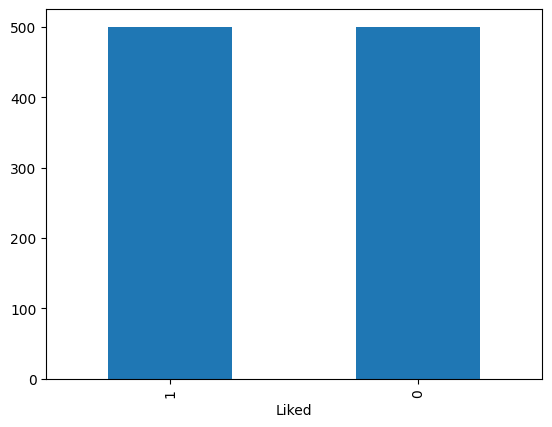

In [6]:
data['Liked'].value_counts().plot(kind='bar')

In [7]:
print("Max sentence length:")
data['Review'].apply(len).max()


Max sentence length:


149

In [8]:
print("\nMin sentence length:")
data['Review'].apply(len).min()


Min sentence length:


11

In [9]:
data['Review letter count'] = data['Review'].apply(len)
data

,Review,Liked,Review letter count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [10]:
data.iloc[[data['Review letter count'].idxmax()]] # max length review

,Review,Liked,Review letter count
985,The problem I have is that they charge $11.99 ...,0,149


In [11]:
import nltk
from nltk.corpus import stopwords

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [15]:
import re
corpus = []

for i in range(len(data)) : 
    s = re.sub('[^a-zA-Z]',"  ",data['Review'][i])
    s = s.lower()
    s = s.split()
    s = [word for word in s if not word in (stopwords.words('english'))]
    s = ' '.join(s)
    s = ps.stem(s)
    corpus.append(s)

corpus


['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [17]:
X.shape

(1000, 1994)

In [18]:
y = data['Liked']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [21]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [22]:
y_test.values

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [23]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65 32]
 [22 81]]


In [24]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.73


In [25]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        97
           1       0.72      0.79      0.75       103

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout , Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping


In [42]:
early_stop = EarlyStopping(
    monitor='val_loss',   
    patience=2,            
    restore_best_weights=True  
)

In [43]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(corpus)

In [44]:
X_seq = tokenizer.texts_to_sequences(corpus)

X_padded = pad_sequences(X_seq, maxlen=100)

y = data['Liked'].values


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [46]:
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [48]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/10
25/25 - 9s - 379ms/step - accuracy: 0.5600 - loss: 0.6917 - val_accuracy: 0.6100 - val_loss: 0.6880
Epoch 2/10
25/25 - 4s - 154ms/step - accuracy: 0.8288 - loss: 0.6533 - val_accuracy: 0.6950 - val_loss: 0.6446
Epoch 3/10
25/25 - 4s - 154ms/step - accuracy: 0.8450 - loss: 0.4784 - val_accuracy: 0.7050 - val_loss: 0.5652
Epoch 4/10
25/25 - 4s - 153ms/step - accuracy: 0.9212 - loss: 0.2888 - val_accuracy: 0.7500 - val_loss: 0.5314
Epoch 5/10
25/25 - 4s - 152ms/step - accuracy: 0.9325 - loss: 0.1778 - val_accuracy: 0.7450 - val_loss: 0.5845
Epoch 6/10
25/25 - 4s - 157ms/step - accuracy: 0.9613 - loss: 0.1213 - val_accuracy: 0.7450 - val_loss: 0.5742


In [49]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7246 - loss: 0.5667
Test Accuracy: 75.00%


In [50]:
model.save("sentiment_model.h5")
